In [1]:
"""Process Leif Anderson's debris thickness data (https://zenodo.org/record/4317470#.X-TlbOlKhTa)"""
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import debrisglobal.globaldebris_input as debris_prms

In [2]:
df_fp = ('/Users/drounce/Documents/DebrisGlaciers_WG/Melt_Intercomparison/hd_obs/datasets/Leif_comparisons/' + 
         'Alps_debris_thicknesses/')
# df_fn = '11.01450_grosseraletsch_anderson2019-welev.csv'
# df_fn = '11.01509_oberaar_anderson2019-welev.csv'
# df_fn = '11.01827_oberaletsch_anderson2019-welev.csv'
# df_fn = '11.02749_cheilon_anderson2019-welev.csv'
# df_fn = '11.02771_piece_anderson2019-welev.csv'
# df_fn = '11.02796_brenay_anderson2019-welev.csv'
df_fn = '11.03005_miage_anderson2019-welev.csv'

In [3]:
df = pd.read_csv(df_fp + df_fn)

In [4]:
df_all = None
for nrow in range(df.shape[0]):
    df_pt = df.loc[[nrow],:]
    
    # Personal communication with Leif Anderson (12/11/2020) assume 5 measurements (3 mean, then 1 for min and max)
    for ncount in range(5):
        if ncount < 3:
            df_pt['hd_m'] = df_pt['mean'] / 100
        elif ncount == 3:
            df_pt['hd_m'] = df_pt['min'] / 100
        elif ncount == 4:
            df_pt['hd_m'] = df_pt['max'] / 100
            
        
        if df_all is None:
            df_all = df_pt
        else:
            df_all = pd.concat([df_all, df_pt], axis=0)

df_all.reset_index(inplace=True, drop=True)

df_all.to_csv(df_fp + '../../' + df_fn.replace('-welev.csv', '-hd.csv'), index=False)

In [5]:
df_fp + '../../' + df_fn.replace('-welev.csv', '-hd.csv')

'/Users/drounce/Documents/DebrisGlaciers_WG/Melt_Intercomparison/hd_obs/datasets/Leif_comparisons/Alps_debris_thicknesses/../../11.03005_miage_anderson2019-hd.csv'

In [6]:
df_all

,pt_id,lat,lon,elev_gps,min,mean,max,elev,hd_m
0,m1,45.78190,6.86765,NaN,25.0,33.0,42.0,2076.0,0.33
1,m1,45.78190,6.86765,NaN,25.0,33.0,42.0,2076.0,0.33
2,m1,45.78190,6.86765,NaN,25.0,33.0,42.0,2076.0,0.33
3,m1,45.78190,6.86765,NaN,25.0,33.0,42.0,2076.0,0.25
4,m1,45.78190,6.86765,NaN,25.0,33.0,42.0,2076.0,0.42
...,...,...,...,...,...,...,...,...,...
800,m161,45.78358,6.87440,NaN,7.0,12.0,32.0,2037.0,0.12
801,m161,45.78358,6.87440,NaN,7.0,12.0,32.0,2037.0,0.12
802,m161,45.78358,6.87440,NaN,7.0,12.0,32.0,2037.0,0.12
803,m161,45.78358,6.87440,NaN,7.0,12.0,32.0,2037.0,0.07


In [69]:
# Load point data
df_fp = '/Users/drounce/Documents/DebrisGlaciers_WG/Melt_Intercomparison/hd_obs/datasets/hd_pt_data/'
# df_fn = '11.02749_cheilon_anderson2019-hd_pt.csv'
df_fn = '15.03733_gibson-hd_pt.csv'
df_pt = pd.read_csv(df_fp + df_fn)
# drop null values
df_pt.loc[df_pt['hd_mod_m'] > debris_prms.hd_max, 'hd_mod_m'] = np.nan
df_pt = df_pt.dropna(subset=['hd_obs_m', 'hd_mod_m'])
df_pt.reset_index(inplace=True, drop=True)
glac_str = df_fn.split('_')[0]

# Load bin data
bin_fp = '/Users/drounce/Documents/DebrisGlaciers_WG/Melt_Intercomparison/hd_obs/hd_processed/'
# bin_fn = '11.02749_cheilon_anderson2019-hd-processed.csv'
bin_fn = '15.03733_gibson-hd-processed.csv'
df_bin = pd.read_csv(bin_fp + bin_fn)

# Uncertainty dataframe and dictionary for bounds
hd_uncertainty_fullfn = debris_prms.output_fp + 'hd_uncertainty_bnds-1std.csv'
hd_uncertainty_df = pd.read_csv(hd_uncertainty_fullfn)
hd_uncertainty_dict_low = dict(zip([int(np.round(x*100)) for x in hd_uncertainty_df['hd_m']], 
                                   list(hd_uncertainty_df['hd_bndlow_both'].values)))
hd_uncertainty_dict_low[0] = 0
hd_uncertainty_dict_low[1] = 0
hd_uncertainty_dict_high = dict(zip([int(np.round(x*100)) for x in hd_uncertainty_df['hd_m']], 
                                   list(hd_uncertainty_df['hd_bndhigh_both'].values)))
hd_uncertainty_dict_high[0] = hd_uncertainty_df.loc[0,'hd_bndhigh_both']
hd_uncertainty_dict_high[1] = hd_uncertainty_df.loc[0,'hd_bndhigh_both']

In [70]:
rmse_pts = (np.sum((df_pt['hd_obs_m'] - df_pt['hd_mod_m'])**2) / df_pt.shape[0])**0.5
print('rmse:', np.round(rmse_pts,2), 'points:', df_pt.shape[0])

rmse: 1.6 points: 80


In [71]:
# Add uncertainty 
df_pt['hd_mod_m_low'] = [hd_uncertainty_dict_low[x] 
                         for x in list(np.round(np.array(df_pt['hd_mod_m'])*100,0).astype(int))]
df_pt['hd_mod_m_high'] = [hd_uncertainty_dict_high[x] 
                          for x in list(np.round(np.array(df_pt['hd_mod_m'])*100,0).astype(int))]
df_pt['hd_mod_m_diflow'] = np.abs(df_pt['hd_mod_m'] - df_pt['hd_mod_m_low'])
df_pt['hd_mod_m_difhigh'] = np.abs(df_pt['hd_mod_m'] - df_pt['hd_mod_m_high'])
df_pt['hd_mod_m_std'] = (df_pt['hd_mod_m_diflow'] + df_pt['hd_mod_m_difhigh']) / 2

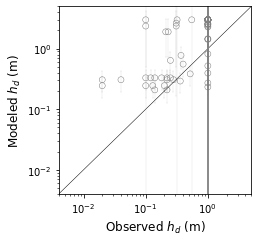

In [73]:
hd_min, hd_max = 0.004, 5
n_obs_min = 5
hd_compare_fp = debris_prms.main_directory + '/../hd_obs/figures/hd_obs_compare/'

fig, ax = plt.subplots(1, 1, squeeze=False, gridspec_kw = {'wspace':0, 'hspace':0})

# Points
ax[0,0].scatter(df_pt['hd_obs_m'].values, 
                df_pt['hd_mod_m'].values, 
                color='grey', marker='o', linewidth=0.5, facecolor='none', 
#                 s=s_plot, zorder=zorder, 
#                 label=label_str, clip_on=True
               )
ax[0,0].errorbar(df_pt['hd_obs_m'], 
                 df_pt['hd_mod_m'], 
                 yerr=df_pt['hd_mod_m_std'], 
                 capsize=1, capthick=lw_err, elinewidth=lw_err, linewidth=0, color='grey', alpha=1, zorder=2)

# # Bins
# for ndata in df_bin.index.values:
#     label_str = None
#     marker = 's'

#     # Size thresholds   
#     s_sizes = [20, 40, 80]
#     lws = [0.5, 1, 1]
#     lws_err = [0.1, 0.5, 0.5]
#     colors = ['grey', '#31a354', '#3182bd']
#     zorders = [3,4,5]
#     obs_count = df_bin.loc[ndata,'obs_count']
#     if obs_count >= n_obs_min and obs_count < 25:
#         s_plot = s_sizes[0]
#         lw = lws[0]
#         lw_err = lws_err[0]
#         color = colors[0]
#         zorder = zorders[0]
#     elif obs_count >= 25 and obs_count < 100:
#         s_plot = s_sizes[1]
#         lw = lws[1]
#         lw_err = lws_err[1]
#         color = colors[1]
#         zorder = zorders[1]
#     elif obs_count >= 100:
#         s_plot = s_sizes[2]
#         lw = lws[2]
#         lw_err = lws_err[2]
#         color = colors[2]
#         zorder = zorders[2]
#     else:
#         print('NO COLOR')

#     ax[0,0].scatter(df_bin.loc[ndata,'hd_obs_med'], 
#                     df_bin.loc[ndata,'hd_ts_med_m'], 
#                     color=color, marker=marker, linewidth=lw, facecolor='none', s=s_plot, zorder=zorder, 
#                     label=label_str, clip_on=True)
#     ax[0,0].errorbar(df_bin.loc[ndata,'hd_obs_med'], 
#                      df_bin.loc[ndata,'hd_ts_med_m'], 
#                      xerr=1.483*df_bin.loc[ndata,'hd_obs_mad'], 
#                      yerr=1.483*df_bin.loc[ndata,'hd_ts_mad_m'], 
#                      capsize=1, capthick=lw_err, elinewidth=lw_err, linewidth=0, color=color, alpha=1, zorder=2)

# Log scale
ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')
            
# Labels
ax[0,0].set_xlabel('Observed $h_{d}$ (m)', size=12)    
ax[0,0].set_ylabel('Modeled $h_{d}$ (m)', size=12)
ax[0,0].set_xlim(hd_min,hd_max)
ax[0,0].set_ylim(hd_min,hd_max)
ax[0,0].plot([hd_min, hd_max], [hd_min, hd_max], color='k', linewidth=0.5, zorder=1)
        
fig.set_size_inches(3.45,3.45)
fig_fullfn = hd_compare_fp + glac_str + '-hd_compare.png'
fig.savefig(fig_fullfn, bbox_inches='tight', dpi=300)

In [20]:
# POINT DATASETS - process such that Leif's data has 5 measurements per site in agreement with his measurements
df_fp = '/Users/drounce/Documents/DebrisGlaciers_WG/Melt_Intercomparison/hd_obs/datasets/hd_pt_data/'
# df_fn = '11.01450_grosseraletsch_anderson2019-hd_pt-old.csv'
# df_fn = '11.01509_oberaar_anderson2019-hd_pt-old.csv'
# df_fn = '11.01827_oberaletsch_anderson2019-hd_pt-old.csv'
# df_fn = '11.02749_cheilon_anderson2019-hd_pt-old.csv'
# df_fn = '11.02771_piece_anderson2019-hd_pt-old.csv'
df_fn = '11.02796_brenay_anderson2019-hd_pt-old.csv'
# # df_fn = '11.03005_miage_anderson2019-hd_pt-old.csv'
df = pd.read_csv(df_fp + df_fn)
df_all = None
for nrow in range(df.shape[0]):
    df_pt = df.loc[[nrow],:]
    
    # Personal communication with Leif Anderson (12/11/2020) assume 5 measurements (3 mean, then 1 for min and max)
    for ncount in range(5):
        if ncount < 3:
            df_pt['hd_m'] = df_pt['mean'] / 100
        elif ncount == 3:
            df_pt['hd_m'] = df_pt['min'] / 100
        elif ncount == 4:
            df_pt['hd_m'] = df_pt['max'] / 100
            
        
        if df_all is None:
            df_all = df_pt
        else:
            df_all = pd.concat([df_all, df_pt], axis=0)

df_all.reset_index(inplace=True, drop=True)

df_all.to_csv(df_fp + df_fn.replace('-old.csv', '.csv'), index=False)